<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-2">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-3">Main</a></span></li></ul></div>

# Dependencies

In [1]:
library(ggforce)

Loading required package: ggplot2



In [2]:
source("~/OneDrive - UHN/R_src//ggplot2_theme.R")

# Paths

In [3]:
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"

# Main

In [4]:
load(file = paste0(datapath, "/ESTIMATE/estimate_manifest_primary_clean.RData"))

In [5]:
CBTN_RNA_manifest_genes <- read.csv(paste0(manifestpath, "CBTTC_RSEM-manifest.csv"),
                               header = TRUE, stringsAsFactors = FALSE)

In [6]:
dim(CBTN_RNA_manifest_genes)

[1] 996  20

In [7]:
CBTN_samples <- cbind.data.frame(CBTN_RNA_manifest_genes$sample_id,
                                 CBTN_RNA_manifest_genes$aliquot_id, stringsAsFactors = F)
colnames(CBTN_samples) <- c("CBTN_sample_id", "CBTN_aliquot_id")

In [8]:
CBTN_samples$CBTN <- "CBTN\nsamples"

In [9]:
CBTN_samples

CBTN_sample_id,CBTN_aliquot_id,CBTN
<chr>,<chr>,<chr>
7316-464,746062,CBTN samples
7316-2724,717144,CBTN samples
7316-4028,724089,CBTN samples
7316-516,571424,CBTN samples
7316-1766,717142,CBTN samples
7316-3336,739926,CBTN samples
7316-4034,724100,CBTN samples
7316-4033,724099,CBTN samples
7316-3488,724084,CBTN samples


In [10]:
CBTN_celllines <- read.csv(paste0(manifestpath,"cell_line_RNAalqids_CBTTC.csv"), 
                             header = TRUE, stringsAsFactors = F)

In [11]:
CBTN_RNA_manifest_genes_linerm <- CBTN_RNA_manifest_genes[!CBTN_RNA_manifest_genes$aliquot_id %in% 
                                                          CBTN_celllines$cell_lines_rnaalq_id,]

In [12]:
CBTN_samples$Cell_lines <- NA
CBTN_samples$Cell_lines[CBTN_samples$CBTN_aliquot_id %in% CBTN_celllines$cell_lines_rnaalq_id] <- "Cell lines"

CBTN_samples$Cell_lines[!CBTN_samples$CBTN_aliquot_id %in% CBTN_celllines$cell_lines_rnaalq_id] <- "Tumours"

In [13]:
table(CBTN_samples$Cell_lines)


Cell lines    Tumours 
        22        974 

In [14]:
CBTN_RNA_manifest_genes_linerm_dedup <- CBTN_RNA_manifest_genes_linerm[!duplicated(CBTN_RNA_manifest_genes_linerm$sample_id),]

In [15]:
dim(CBTN_RNA_manifest_genes_linerm_dedup)

[1] 969  20

In [16]:
CBTN_samples$duplicated_events <- NA

CBTN_samples$duplicated_events[duplicated(CBTN_samples$CBTN_sample_id)] <- "Duplicated\nevents"
CBTN_samples$duplicated_events[!duplicated(CBTN_samples$CBTN_sample_id)] <- "Unique events"

In [17]:
table(CBTN_samples$duplicated_events)


Duplicated\nevents      Unique events 
                23                973 

In [18]:
table(CBTN_RNA_manifest_genes$Tumor.Descriptor)


                  Initial CNS Tumor       Progressive        Recurrence 
                1               718               152                69 
Second Malignancy       Unavailable 
               19                37 

In [19]:
primaries <- CBTN_RNA_manifest_genes$sample_id[CBTN_RNA_manifest_genes$Tumor.Descriptor == "Initial CNS Tumor"]
progressives <- CBTN_RNA_manifest_genes$sample_id[CBTN_RNA_manifest_genes$Tumor.Descriptor == "Progressive"]
recurrences <- CBTN_RNA_manifest_genes$sample_id[CBTN_RNA_manifest_genes$Tumor.Descriptor == "Recurrence"]
secondmalig <- CBTN_RNA_manifest_genes$sample_id[CBTN_RNA_manifest_genes$Tumor.Descriptor == "Second Malignancy"]
notavailables <- CBTN_RNA_manifest_genes$sample_id[CBTN_RNA_manifest_genes$Tumor.Descriptor == "Unavailable"]

In [20]:
CBTN_samples$tumour_type <- NA
CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% primaries ] <- "Primary"
CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% progressives ] <- "Progressive"
CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% recurrences ] <- "Recurrence"
CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% secondmalig ] <- "Second\nMalignancy"
CBTN_samples$tumour_type[ CBTN_samples$CBTN_sample_id %in% notavailables ] <- "Not\nAvailable"

In [21]:
table(CBTN_samples$tumour_type, useNA = "always")


    Not\nAvailable            Primary        Progressive         Recurrence 
                37                718                152                 69 
Second\nMalignancy               <NA> 
                19                  1 

In [22]:
CBTN_samples$tumour_type[ is.na(CBTN_samples$tumour_type)] <- "Not\nAvailable"

In [23]:
load(file = paste0(datapath,"ESTIMATE/estimate_manifest_primary_clean.RData"))

In [24]:
head(estimate_manifest_primary_clean)

,aliquot_id,StromalScore,ImmuneScore,ESTIMATEScore,name,case_id,sample_id,gender,ethnicity,race,⋯,vital_status,days_to_death,days_to_progress,recurrence,disease_type,primary_site,group,cohort,sample_type,age_class
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TARGET-30-PAIFXV-01A-01R,-537.97880,483.8556,-54.1232,af82838c-9071-4dd7-8766-b818cf61cf82.bam,TARGET-30-PAIFXV,TARGET-30-PAIFXV-01A,Female,Unknown,White,⋯,0,2075,1675,1,Neuroblastoma,Abdomen,TARGET,NBL,Primary Tumor,Children
2,TARGET-30-PAIPGU-01A-01R,-319.22630,1240.6492,921.4229,b1d954e7-21a0-441e-a9c7-47e6a6454625.bam,TARGET-30-PAIPGU,TARGET-30-PAIPGU-01A,Female,Unknown,White,⋯,0,1976,1976,0,Neuroblastoma,Adrenal gland,TARGET,NBL,Primary Tumor,NA
3,TARGET-30-PAISNS-01A-01R,-899.30090,-128.2337,-1027.5347,7e145f1d-1807-4615-95b5-2684ccbcb348.bam,TARGET-30-PAISNS,TARGET-30-PAISNS-01A,Male,Unknown,White,⋯,0,2829,2829,0,Neuroblastoma,Abdomen,TARGET,NBL,Primary Tumor,NA
4,TARGET-30-PAITCI-01A-01R,-327.26820,200.6735,-126.5947,9704403e-aaf9-4a97-99bc-b2a9a9861767.bam,TARGET-30-PAITCI,TARGET-30-PAITCI-01A,Male,Unknown,White,⋯,0,333,201,1,Neuroblastoma,Adrenal gland,TARGET,NBL,Primary Tumor,Infants
5,TARGET-30-PAIVHE-01A-01R,-15.87499,1033.6469,1017.7719,d8d30bd7-608d-4cbd-ba31-3f1fa6fefacf.bam,TARGET-30-PAIVHE,TARGET-30-PAIVHE-01A,Male,not hispanic or latino,White,⋯,0,768,709,1,"Ganglioneuroblastoma, nodular",Adrenal gland,TARGET,NBL,Primary Tumor,Children
6,TARGET-30-PAIXIF-01A-01R,460.15050,978.1672,1438.3177,7c2b0108-1231-4543-a8bf-eb6644e76f41.bam,TARGET-30-PAIXIF,TARGET-30-PAIXIF-01A,Male,Unknown,Unknown,⋯,1,3122,302,1,Neuroblastoma,Retroperitoneum,TARGET,NBL,Primary Tumor,Children


In [25]:
dim(estimate_manifest_primary_clean)

[1] 3429   21

In [26]:
goodsamplesize <- estimate_manifest_primary_clean$sample_id

In [27]:
CBTN_samples$sufficient_samplesize <- NA

CBTN_samples$sufficient_samplesize[ CBTN_samples$CBTN_sample_id %in% goodsamplesize ] <- "Cancers with\nsufficient\nsample size"
CBTN_samples$sufficient_samplesize[! CBTN_samples$CBTN_sample_id %in% goodsamplesize ] <- "Rare/unannotated\ntumor"

In [28]:
table(CBTN_samples$sufficient_samplesize, useNA = "always")


Cancers with\nsufficient\nsample size               Rare/unannotated\ntumor 
                                  643                                   353 
                                 <NA> 
                                    0 

In [29]:
load(file = paste0(datapath, "ESTIMATE/estimate_manifest_primary_clean_postclustering.RData"))  

In [30]:
dim(estimate_manifest_primary_clean)

[1] 3378   21

In [31]:
comparablepurity <- estimate_manifest_primary_clean$sample_id

In [32]:
CBTN_samples$tumorpurity <- NA

CBTN_samples$tumorpurity[ CBTN_samples$CBTN_sample_id %in% comparablepurity ] <- "Comparable purity"
CBTN_samples$tumorpurity[! CBTN_samples$CBTN_sample_id %in% comparablepurity ] <- "Low purity"

In [33]:
table(CBTN_samples$tumorpurity, useNA = "always")


Comparable purity        Low purity              <NA> 
              589               407                 0 

In [34]:
head(CBTN_samples)

,CBTN_sample_id,CBTN_aliquot_id,CBTN,Cell_lines,duplicated_events,tumour_type,sufficient_samplesize,tumorpurity
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,7316-464,746062,CBTN samples,Tumours,Unique events,Primary,Rare/unannotated tumor,Low purity
2,7316-2724,717144,CBTN samples,Tumours,Unique events,Second Malignancy,Rare/unannotated tumor,Low purity
3,7316-4028,724089,CBTN samples,Tumours,Unique events,Primary,Cancers with sufficient sample size,Comparable purity
4,7316-516,571424,CBTN samples,Tumours,Unique events,Primary,Cancers with sufficient sample size,Comparable purity
5,7316-1766,717142,CBTN samples,Tumours,Unique events,Progressive,Rare/unannotated tumor,Low purity
6,7316-3336,739926,CBTN samples,Tumours,Unique events,Primary,Rare/unannotated tumor,Low purity


In [35]:
table(CBTN_samples$tumorpurity, useNA = "always")


Comparable purity        Low purity              <NA> 
              589               407                 0 

In [36]:
freqtab <- as.data.frame(table(CBTN_samples$CBTN, CBTN_samples$Cell_lines, CBTN_samples$duplicated_events,
                              CBTN_samples$tumour_type, CBTN_samples$sufficient_samplesize,
                              CBTN_samples$tumorpurity), stringsAsFactors = F)

In [37]:
freqtab[order(freqtab$Freq, decreasing = T),]

,Var1,Var2,Var3,Var4,Var5,Var6,Freq
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
8,CBTN samples,Tumours,Unique events,Primary,Cancers with sufficient sample size,Comparable purity,555
72,CBTN samples,Tumours,Unique events,Progressive,Rare/unannotated tumor,Low purity,144
68,CBTN samples,Tumours,Unique events,Primary,Rare/unannotated tumor,Low purity,93
76,CBTN samples,Tumours,Unique events,Recurrence,Rare/unannotated tumor,Low purity,68
48,CBTN samples,Tumours,Unique events,Primary,Cancers with sufficient sample size,Low purity,46
4,CBTN samples,Tumours,Unique events,Not Available,Cancers with sufficient sample size,Comparable purity,22
80,CBTN samples,Tumours,Unique events,Second Malignancy,Rare/unannotated tumor,Low purity,16
64,CBTN samples,Tumours,Unique events,Not Available,Rare/unannotated tumor,Low purity,13
6,CBTN samples,Tumours,Duplicated events,Primary,Cancers with sufficient sample size,Comparable purity,5


In [43]:
freqtab_ggforce <- gather_set_data(freqtab, 1:6)

In [44]:
freqtab_ggforce$includedsamples[ freqtab_ggforce$Freq == 555] <- "Yes"

In [45]:
head(freqtab_ggforce)

,Var1,Var2,Var3,Var4,Var5,Var6,Freq,id,x,y,includedsamples
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,CBTN samples,Cell lines,Duplicated events,Not Available,Cancers with sufficient sample size,Comparable purity,0,1,Var1,CBTN samples,NA
2,CBTN samples,Tumours,Duplicated events,Not Available,Cancers with sufficient sample size,Comparable purity,0,2,Var1,CBTN samples,NA
3,CBTN samples,Cell lines,Unique events,Not Available,Cancers with sufficient sample size,Comparable purity,0,3,Var1,CBTN samples,NA
4,CBTN samples,Tumours,Unique events,Not Available,Cancers with sufficient sample size,Comparable purity,22,4,Var1,CBTN samples,NA
5,CBTN samples,Cell lines,Duplicated events,Primary,Cancers with sufficient sample size,Comparable purity,3,5,Var1,CBTN samples,NA
6,CBTN samples,Tumours,Duplicated events,Primary,Cancers with sufficient sample size,Comparable purity,5,6,Var1,CBTN samples,NA


In [46]:
p_plot <- ggplot(freqtab_ggforce, aes(x, id = id, split = y, value = Freq)) +
geom_parallel_sets(aes(fill = includedsamples), alpha = 0.3, axis.width = 0.1) +
geom_parallel_sets_axes(axis.width = 0.3, fill = "dark gray") +
geom_parallel_sets_labels(colour = 'black', size = 10, angle = 0) + 
myaxis + myplot + 
theme(plot.margin = unit(c(1,10,1,1),"cm"),
      legend.position = "none", axis.title.x = element_blank(), axis.text.x = element_blank()) +
scale_y_continuous(expand = c(0.05, 0.5)) + scale_x_discrete(expand = c(0.1, 0.1)) 

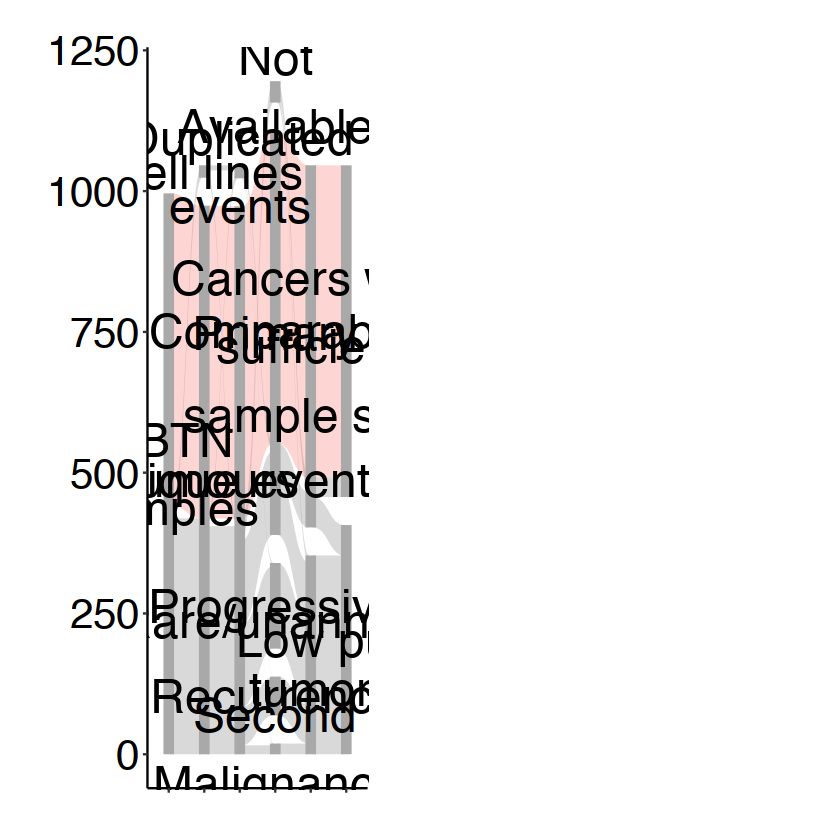

In [47]:
p_plot

In [48]:
pdf(paste0(plotpath, "CBTN_alluvial.pdf"),
   width = 30, height = 10,
   useDingbats = FALSE)
p_plot
   
dev.off()

pdf 
  2